In [5]:
import numpy as np
import subprocess as sp
import scipy
from matplotlib import pyplot as plt

In [6]:
line = "S"+"{:04d}".format(1) + \
    5*" " + "AA" + 5*" " + \
        "{:10.3f}".format(110.0) + 5*" " + \
            "{:10.3f}".format(110.0) + \
                5*" " + "0.0" + 5*" " + "0.0"

print(line)

# with open(fid_path, "w") as fid:
#     lines = fid.readlines()

S0001     AA        110.000        110.000     0.0     0.0


2468.800092080972


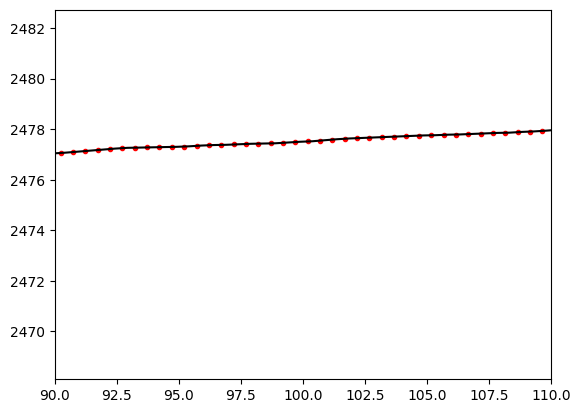

In [23]:
# recievers are every 0.5 m along the line starting at 0.5 m

topo = np.loadtxt("Field-Data/topo.txt")

# compute the path length of the topography

L = np.zeros(len(topo))

for i in range(1, len(L)):
    L[i] = L[i-1] + np.sqrt((topo[i,0] - topo[i-1,0])**2 + (topo[i,1] - topo[i-1,1])**2)

stretch = 200.0001/np.max(L)
L *= stretch

# interpolate the x-cordinate as a function of path length
x_interp = scipy.interpolate.interp1d(L, topo[:,0])

# interpolate the elevation as function of the x-cordinate
topo_interp = scipy.interpolate.interp1d(topo[:,0], topo[:,1])

rec_x = x_interp(np.arange(0.5, 200.5, 0.5))
rec_z = topo_interp(rec_x)

plt.plot(topo[:,0], topo[:,1], "k")
plt.scatter(rec_x, rec_z, marker=".", color="r")
plt.xlim([90, 110])

print(rec_z[0])

In [21]:
lines = []

for i in range(len(rec_x)):

    line = "S"+"{:04d}".format(i+1) + \
            5*" " + "AA" + 5*" " + \
            "{:10.5f}".format(rec_x[i]) + 5*" " + \
            "{:10.5f}".format(rec_z[i]) + \
            5*" " + "0.0" + 5*" " + "0.0\n"

    lines.append(line)


In [22]:
fid_path = "specfem2d/DATA/STATIONS"

with open(fid_path, "w") as fid:
    fid.writelines(lines)